In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

### Base Risco Credito

In [2]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
        X_risco_credito, y_risco_creditto = pickle.load(f)

In [3]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [4]:
y_risco_creditto

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [5]:
arvore_decisao_credito = DecisionTreeClassifier(criterion='entropy')
arvore_decisao_credito.fit(X_risco_credito, y_risco_creditto)

DecisionTreeClassifier(criterion='entropy')

In [6]:
arvore_decisao_credito.feature_importances_

array([0.41607015, 0.06408636, 0.03885431, 0.48098917])

In [7]:
arvore_decisao_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

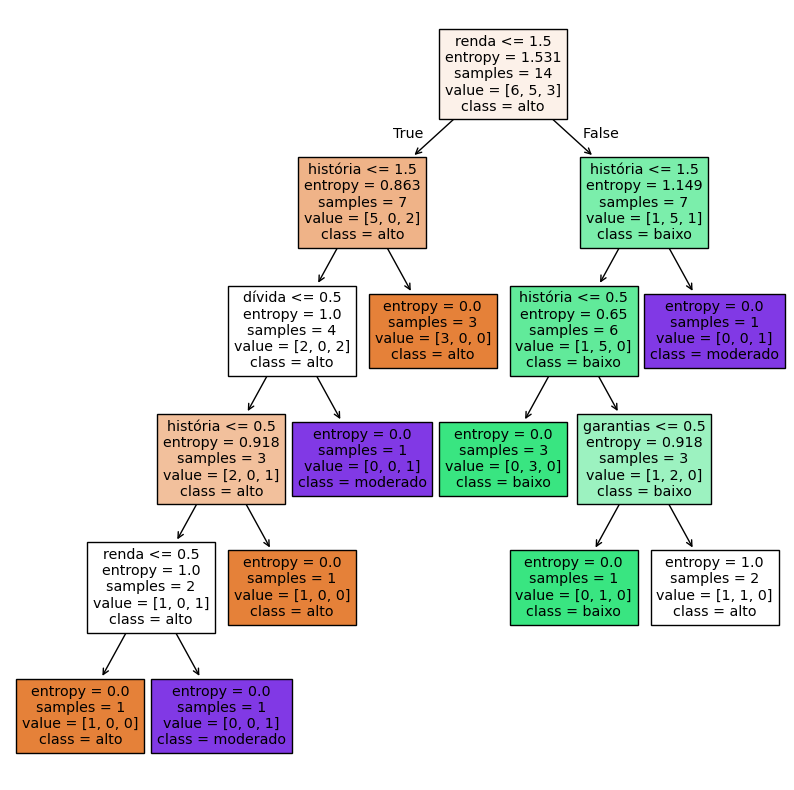

In [8]:
from sklearn import tree
previsores = ['história', 'dívida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_decisao_credito, feature_names=previsores, class_names = arvore_decisao_credito.classes_, filled=True);

In [9]:
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsoes = arvore_decisao_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

### Base Credit Data - 98,20%

In [13]:
import pickle

In [14]:
with open('credit.pkl', 'rb')  as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [11]:
print(X_credit_treinamento.shape)
print(y_credit_treinamento.shape)

(1500, 3)
(1500,)


In [12]:
print(X_credit_teste.shape)
print(y_credit_teste.shape)

(500, 3)
(500,)


In [13]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [14]:
previsoes_credit = arvore_credit.predict(X_credit_teste)
previsoes_credit

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [15]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [16]:
from sklearn.metrics import accuracy_score, classification_report

In [17]:
accuracy_score(y_credit_teste, previsoes_credit)

0.982

0.982

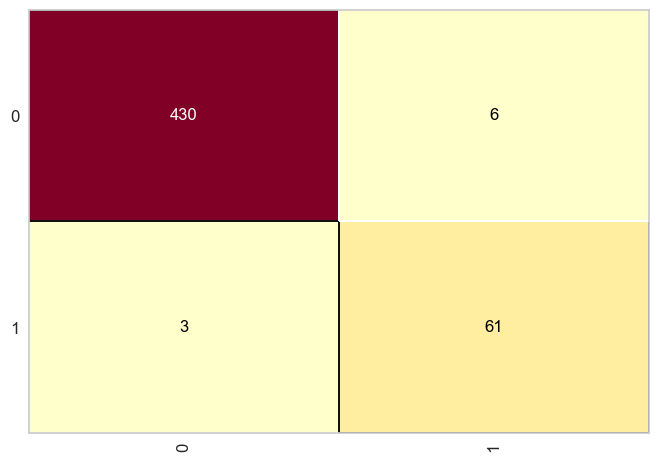

In [18]:
from yellowbrick.classifier import ConfusionMatrix
cm=ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [19]:
print(classification_report(y_credit_teste, previsoes_credit))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



In [20]:
arvore_credit.classes_

array([0, 1], dtype=int64)

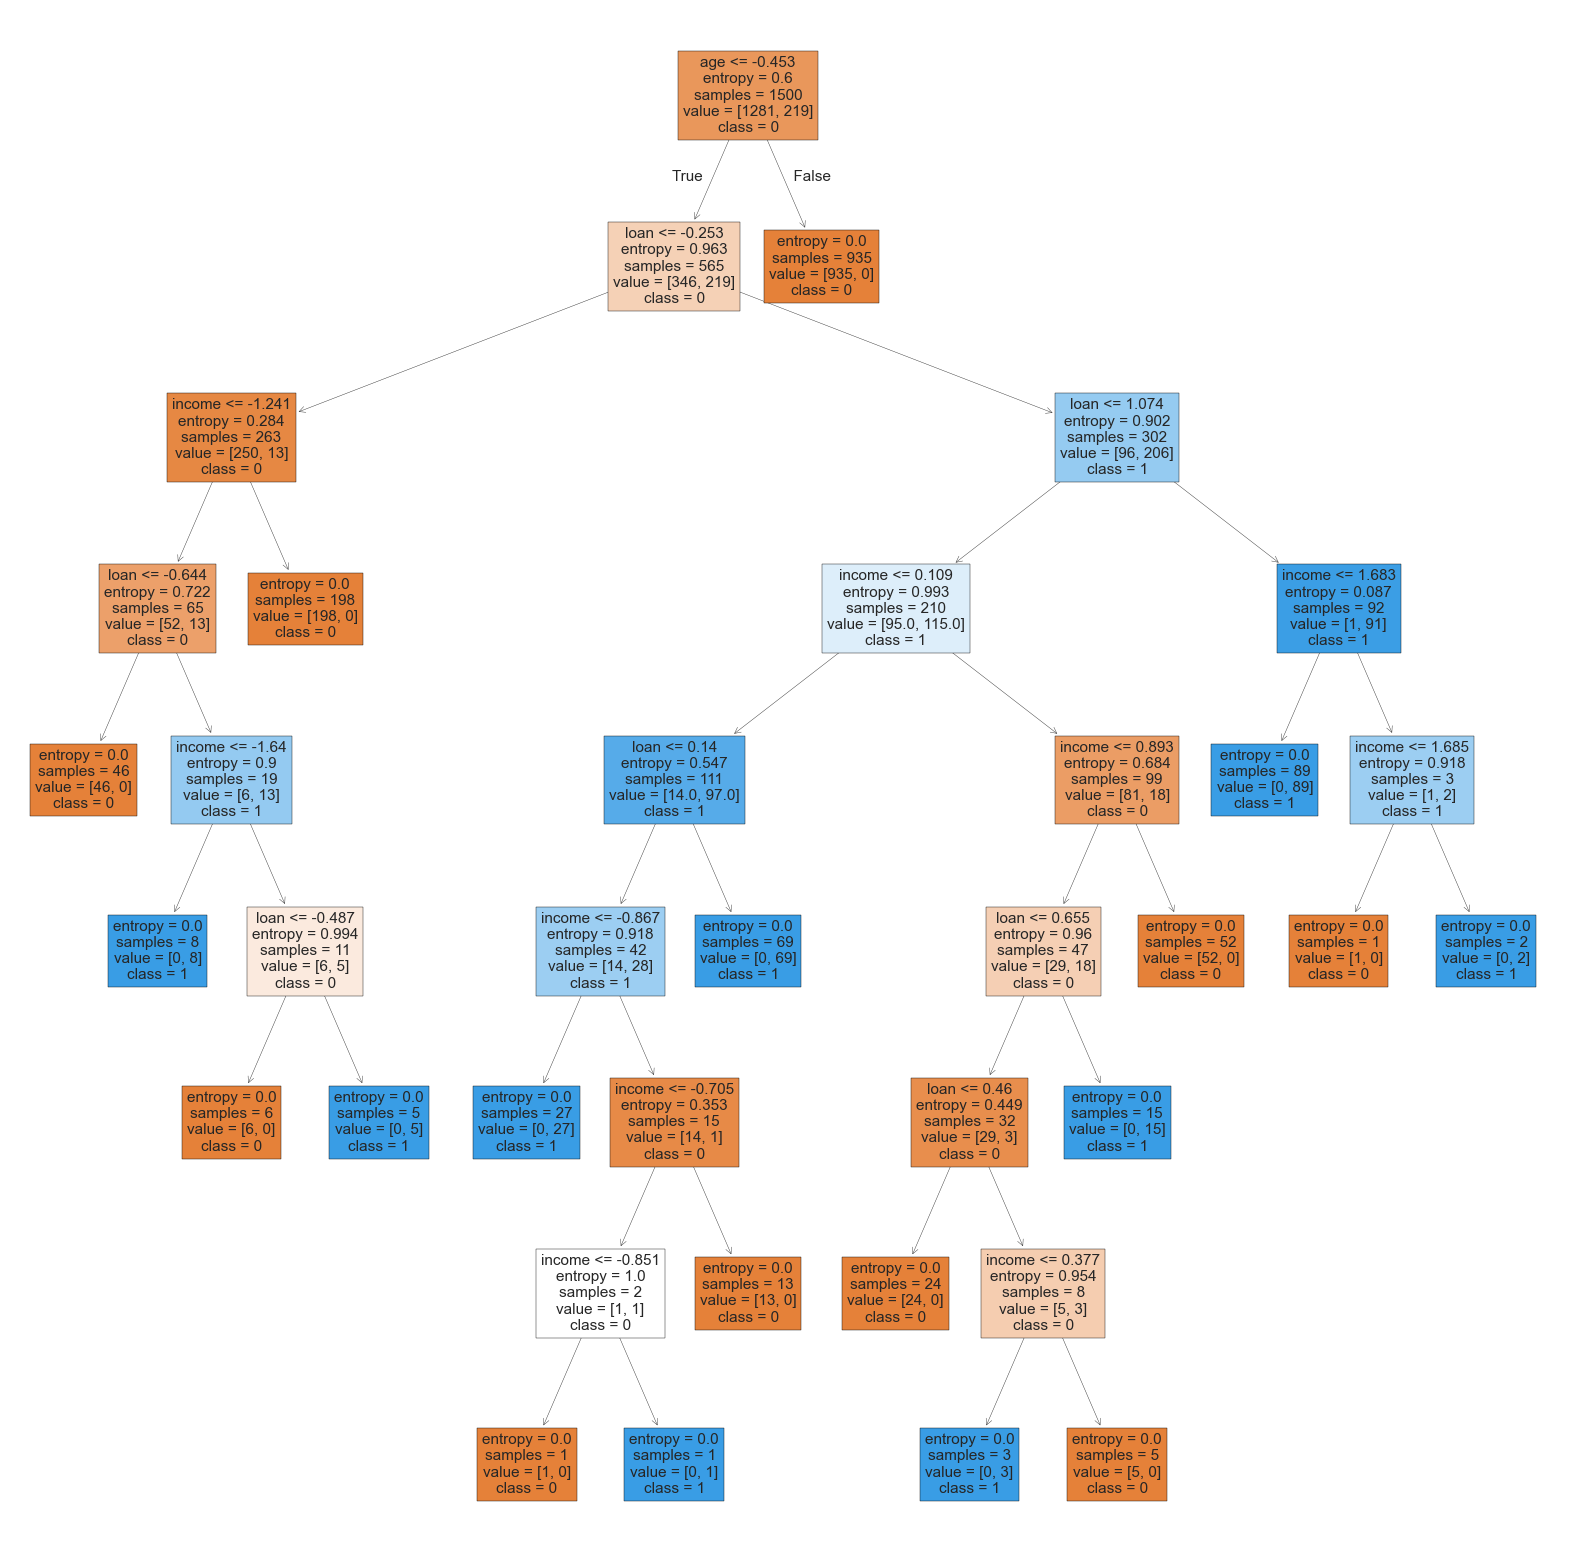

In [21]:
from sklearn import tree
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=['0', '1'], filled= True)
fig.savefig('arvore_credit.jpg')

### Base Census - 81,04%

In [22]:
with open ('census.pkl', 'rb') as f:
    X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [23]:
print(X_census_treinamento.shape) 
print(y_census_treinamento.shape)

(27676, 108)
(27676,)


In [24]:
print(X_census_teste.shape)
print(y_census_teste.shape)

(4885, 108)
(4885,)


In [25]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [26]:
previsoes = arvore_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [27]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [28]:
accuracy_score(y_census_teste, previsoes)

0.8104401228249745

0.8104401228249745

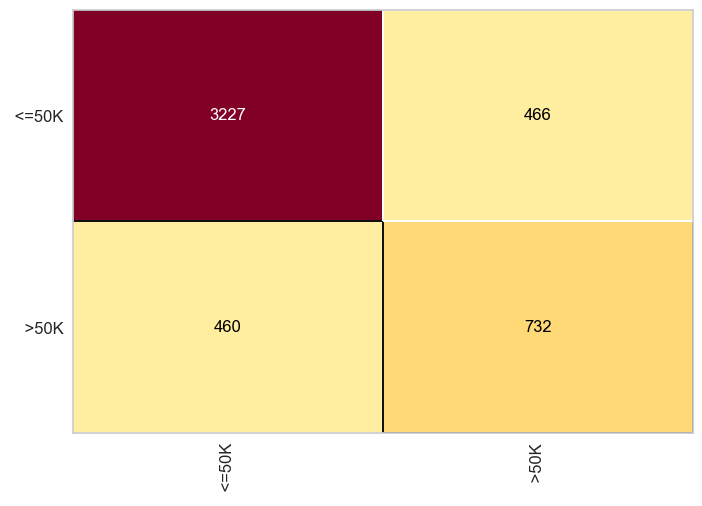

In [32]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [33]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



Ajuste dos parametros com o GridSearch

In [3]:
with open('credit.pkl', 'rb')  as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [12]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis=0)
X_credit.shape

(2000, 3)

In [11]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis=0)
y_credit.shape

(2000,)

In [23]:
# parametros = {'criterion':['gini', 'entropy'],
#               'splitter': ['best', 'random'],
#               'min_samples_split': [2, 5, 10],
#               'min_samples_leaf': [1, 5, 10]}

parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

# # Instanciando o DecisionTreeClassifier
estimator = DecisionTreeClassifier()

# # Criando a GridSearchCV com o estimator e os parâmetros
grid_search = GridSearchCV(estimator=estimator, param_grid=parametros)

# # Realizando o fit com os dados
#grid_search.fit(X_credit, y_credit)

#grid_search = GridSearchCV(estimator=DecisionTreeClassifier, param_grid=parametros)
#grid_search.fit(X_credit, y_credit)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

# Instanciando o DecisionTreeClassifier
estimator = DecisionTreeClassifier()

# Criando a GridSearchCV com o estimator e os parâmetros
grid_search = GridSearchCV(estimator=estimator, param_grid=parametros)

# Realizando o fit com os dados
grid_search.fit(X_credit, y_credit)

# Obtendo os melhores parâmetros e resultado
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

# Imprimindo os resultados
print(melhores_parametros)
print(melhor_resultado)


{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


Validação Cruzada

In [6]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [16]:
import numpy as np
X_credit = np.concatenate(((X_credit_treinamento, X_credit_teste)), axis=0)
y_credit = np.concatenate(((y_credit_treinamento, y_credit_teste)), axis=0)

In [20]:
resultados_arvore = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    arvore = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split =  5, splitter = 'best')
    scores = cross_val_score(arvore, X_credit, y_credit, cv = kfold)
    # print(scores)
    # print(scores.mean())
    resultados_arvore.append(scores.mean())

In [21]:
resultados_arvore

[0.9864999999999998,
 0.9854999999999998,
 0.9905000000000002,
 0.9879999999999999,
 0.9884999999999999,
 0.9890000000000001,
 0.9884999999999999,
 0.9875,
 0.9870000000000001,
 0.9869999999999999,
 0.9865,
 0.9894999999999999,
 0.9884999999999999,
 0.9864999999999998,
 0.9825000000000002,
 0.9859999999999998,
 0.9855,
 0.9904999999999999,
 0.9875,
 0.9869999999999999,
 0.983,
 0.9865,
 0.9889999999999999,
 0.9875,
 0.9870000000000001,
 0.9880000000000001,
 0.9875,
 0.986,
 0.986,
 0.9880000000000001]

In [ ]:

from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

resultados_arvore = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
    scores = cross_val_score(arvore, X_credit, y_credit, cv=kfold)
    resultados_arvore.append(scores)

In [ ]:
# Criar um dta frmae com todos os rtresultgaods

resultados = pd.Dataframe({
    'Arvore': resultados_arvore, 'Random forest': resultados_randon_forest,
    'KNN': resultados_knn, 'Logistica': resultados_logistia,
    'SVM': resultados_svm, 'Rede Neural': resultdos_rede_neural}
    )
resultado